In the part that I import my data, I have used try…except statement to give me a certain degree of redundancy to ensure that my data could successfully be imported even if the online sources is not able to work.

In the part that I am cleaning my data, I found that even the data are from the same file, the recent data can have a very different structure when compared to the data that is before march2022. Therefore, in order not to affect the following part of data modelling and trend analysis, I have dropped all the data before the 1/3/2022 and decided to use 1 March to be the reference zero for the trend analysis.
After removing a large bunch of unrelated and unusable data, I also computed the difference between the accumulated data so that I can have a clearer look to the growth rate.

In the part of data visualizing and data modelling, I used a library called “scikit-learn” for the curve fitting, with the aid of multiple for loops and if statements.

After all the analysis, we are clear to make a conclusion that the positive cases recently has really dropped significantly though there is a little rising trend in the RAT positive cases. But overall the data are still very stable and I would think that government would be likely to further lift up the covied restriction policies and facilitates my trip.

# Citation

Department of Health. Edited by Department of Health, https://data.gov.hk/en-data/dataset/hk-dh-chpsebcddr-novel-infectious-agent/resource/ba2e9938-4005-4b35-aea0-13dc25cf9d0f § (2022). https://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv.

# Declaration

In [1]:
# ENGG1003 Digital Literacy and Computational Thinking - P
#
# Course Project
#
# I declare that the project here submitted is original
# except for source material explicitly acknowledged,
# and that the same or closely related material has not been
# previously submitted for another course.
# I also acknowledge that I am aware of University policy and
# regulations on honesty in academic work, and of the disciplinary
# guidelines and procedures applicable to breaches of such
# policy and regulations, as contained in the website.
#
# University Guideline on Academic Honesty:
# https://www.cuhk.edu.hk/policy/academichonesty/
#
# Student Name : Yu Ching Hei
# Student ID : 1155193237
# Class/Section : ENGG1003EE
# Date : 2/12/2022

# Import Packages

In [2]:
from tkinter import TRUE

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt
import datetime

# Input data with redundancy


In [3]:
try:
    from urllib.request import Request, urlopen #fetche data from online updated resources

    req = Request('https://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv')
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    content = urlopen(req)

    print("Data from ONLINE updated resources")
    RefereceDate = datetime.date.today()
    print("Analyse up to:",RefereceDate)

    covid_data = pd.read_csv(content)

except:
    covid_data = pd.read_csv('./Data/Comparison_of_deceased_and_reported_cases_20221029.csv')
    print("Online data not available, last updated till 2022-10-29")

Data from ONLINE updated resources
Analyse up to: 2022-12-04


# Print Data


In [4]:
covid_data

,As of date,As of time,Number of confirmed cases,Number of ruled out cases,Number of cases still hospitalised for investigation,Number of cases fulfilling the reporting criteria,Number of death cases,Number of discharge cases,Number of probable cases,Number of hospitalised cases in critical condition,Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests,Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests
0,08/01/2020,12:00,0.0,21.0,17.0,38.0,0,0.0,0.0,NaN,NaN,NaN
1,09/01/2020,12:00,0.0,25.0,23.0,48.0,0,0.0,0.0,NaN,NaN,NaN
2,10/01/2020,12:00,0.0,31.0,23.0,54.0,0,0.0,0.0,NaN,NaN,NaN
3,11/01/2020,12:00,0.0,46.0,15.0,61.0,0,0.0,0.0,NaN,NaN,NaN
4,12/01/2020,12:00,0.0,51.0,16.0,67.0,0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,29/11/2022,NaN,NaN,NaN,NaN,NaN,10731,98738.0,NaN,14.0,1050699.0,1058736.0
1057,30/11/2022,NaN,NaN,NaN,NaN,NaN,10747,99099.0,NaN,15.0,1053254.0,1064991.0
1058,01/12/2022,NaN,NaN,NaN,NaN,NaN,10762,99432.0,NaN,18.0,1055730.0,1072652.0
1059,02/12/2022,NaN,NaN,NaN,NaN,NaN,10773,99728.0,NaN,13.0,1058215.0,1080163.0


In [5]:
covid_data.columns

Index(['As of date', 'As of time', 'Number of confirmed cases',
       'Number of ruled out cases',
       'Number of cases still hospitalised for investigation',
       'Number of cases fulfilling the reporting criteria',
       'Number of death cases', 'Number of discharge cases',
       'Number of probable cases',
       'Number of hospitalised cases in critical condition',
       'Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests',
       'Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests'],
      dtype='object')

In [6]:
covid_data.dtypes

As of date                                                                      object
As of time                                                                      object
Number of confirmed cases                                                      float64
Number of ruled out cases                                                      float64
Number of cases still hospitalised for investigation                           float64
Number of cases fulfilling the reporting criteria                              float64
Number of death cases                                                            int64
Number of discharge cases                                                      float64
Number of probable cases                                                       float64
Number of hospitalised cases in critical condition                             float64
Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests     float64
Number of cases tested positive for SARS-Co

# Clean up data


## Column lables

In [7]:
covid_data = covid_data.rename(columns={'As of date':'Date',
                                        'As of time':'Time',
                                        'Number of confirmed cases':'Confirmed',
                                        'Number of ruled out cases':'Ruled',
                                        'Number of cases still hospitalised for investigation':'Hos_Investigation',
                                        'Number of cases fulfilling the reporting criteria':'Report',
                                        'Number of death cases':'Deaths',
                                        'Number of discharge cases':'Discharge',
                                        'Number of hospital cases':'Hospital',
                                        'Number of probable cases':'Probable',
                                        'Number of hospitalised cases in critical condition':'Critical',
                                        'Number of cases tested positive for SARS-CoV-2 virus by nucleic acid tests':'PCR-positive',
                                        'Number of cases tested positive for SARS-CoV-2 virus by rapid antigen tests':'RAT-positive'
                                        })

covid_data.dtypes

Date                  object
Time                  object
Confirmed            float64
Ruled                float64
Hos_Investigation    float64
Report               float64
Deaths                 int64
Discharge            float64
Probable             float64
Critical             float64
PCR-positive         float64
RAT-positive         float64
dtype: object

## Casting data types

In [8]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'], format='%d/%m/%Y')

## Removing irrelevant data


In [9]:
covid_data = covid_data[covid_data['Date'] >= datetime.datetime(2022,3,1)]
covid_data.drop("Time",inplace=True,axis=1) #drop all irrelevant columns
covid_data.drop("Confirmed",inplace=True,axis=1)
covid_data.drop("Ruled",inplace=True,axis=1)
covid_data.drop("Hos_Investigation",inplace=True,axis=1)
covid_data.drop("Report",inplace=True,axis=1)
covid_data.drop("Probable",inplace=True,axis=1)
covid_data.drop("Discharge",inplace=True,axis=1)
covid_data = covid_data.reset_index(drop=TRUE)
covid_data = covid_data.reset_index()

## Print Cleaned Stat


In [10]:
print("Covid_Case_Statistics\n================================================================")
covid_data.iloc[:,1:].describe()

Covid_Case_Statistics


,Deaths,Critical,PCR-positive,RAT-positive
count,278.000000,278.000000,2.780000e+02,2.780000e+02
mean,9128.151079,21.183453,8.303211e+05,5.960838e+05
std,1821.316360,29.591786,1.328825e+05,2.235936e+05
min,990.000000,0.000000,2.383770e+05,9.302500e+04
25%,9348.250000,5.000000,7.596975e+05,4.471888e+05
50%,9438.500000,10.000000,7.969860e+05,4.990680e+05
75%,10113.500000,16.000000,9.441852e+05,8.003405e+05
max,10790.000000,119.000000,1.060540e+06,1.087949e+06


# Extract Data Difference

In [11]:
print("Dataframe structure\n"
      "================================================================")

diff_data = pd.DataFrame({'Delta_death':covid_data['Deaths'], # define data difference array
                          'Delta_pcr':covid_data['PCR-positive'],
                          'Delta_rat':covid_data['RAT-positive']
                          })
diff_data = diff_data.diff()
diff_data = diff_data.fillna(value=0)
print(diff_data)

print("Array structure\n"
      "================================================================")

diff_array = diff_data.to_numpy()
diff_death = diff_array.T[0]
diff_pcr = diff_array.T[1]
diff_rat = diff_array.T[2]
diff_array


Dataframe structure
     Delta_death  Delta_pcr  Delta_rat
0            0.0        0.0        0.0
1          178.0    55353.0    20988.0
2          198.0    56827.0    20164.0
3          188.0    52523.0    20159.0
4          220.0    37529.0    30054.0
..           ...        ...        ...
273         13.0     2097.0     5450.0
274         16.0     2555.0     6255.0
275         15.0     2476.0     7661.0
276         11.0     2485.0     7511.0
277         17.0     2325.0     7786.0

[278 rows x 3 columns]
Array structure


array([[0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.7800e+02, 5.5353e+04, 2.0988e+04],
       [1.9800e+02, 5.6827e+04, 2.0164e+04],
       [1.8800e+02, 5.2523e+04, 2.0159e+04],
       [2.2000e+02, 3.7529e+04, 3.0054e+04],
       [2.3300e+02, 3.1008e+04, 8.7930e+03],
       [2.8000e+02, 2.5150e+04, 1.1245e+04],
       [2.9100e+02, 2.8475e+04, 1.0276e+04],
       [2.9100e+02, 2.5991e+04, 4.4700e+03],
       [2.8100e+02, 2.4390e+04, 7.0120e+03],
       [2.9400e+02, 1.8888e+04, 1.0493e+04],
       [2.8500e+02, 1.5789e+04, 1.1858e+04],
       [2.6400e+02, 1.3335e+04, 1.9095e+04],
       [2.8600e+02, 1.2040e+04, 1.4868e+04],
       [2.8900e+02, 1.1956e+04, 1.5809e+04],
       [2.7900e+02, 1.4454e+04, 1.4818e+04],
       [2.8900e+02, 8.6280e+03, 1.3022e+04],
       [2.6500e+02, 7.9660e+03, 1.2116e+04],
       [2.4900e+02, 7.5280e+03, 9.0690e+03],
       [2.4600e+02, 5.8760e+03, 8.2730e+03],
       [2.2300e+02, 4.5230e+03, 9.5450e+03],
       [2.4500e+02, 4.2960e+03, 9.8560e+03],
       [2.

# Visualize Data


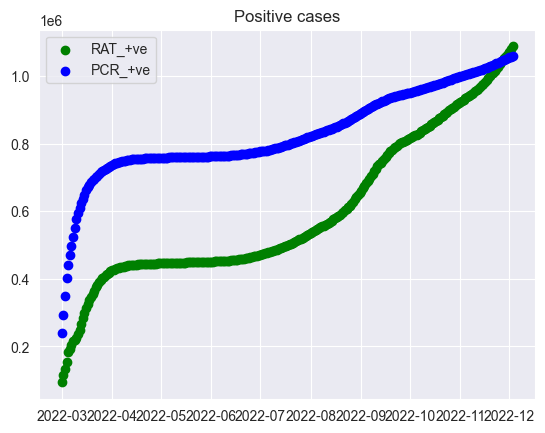

In [12]:
plt.figure()

plt.scatter(covid_data['Date'], covid_data['RAT-positive'], color='green', label='RAT_+ve')
plt.scatter(covid_data['Date'], covid_data['PCR-positive'], color='blue', label='PCR_+ve')
plt.title("Positive cases")

plt.legend(loc='upper left')

plt.show()

# Covert DataFrame to Array

In [13]:
covid_array = covid_data.to_numpy()
covid_array = np.delete(covid_array,1,axis=1) # Remove Date column
array_Day = covid_array.T[0]
array_Death = covid_array.T[1]
array_Critical = covid_array.T[2]
array_PCR = covid_array.T[3]
array_RAT = covid_array.T[4]
print(covid_array.shape)
covid_array

(278, 5)


array([[0, 990, 16.0, 238377.0, 93025.0],
       [1, 1168, 16.0, 293730.0, 114013.0],
       [2, 1366, 16.0, 350557.0, 134177.0],
       ...,
       [275, 10762, 18.0, 1055730.0, 1072652.0],
       [276, 10773, 13.0, 1058215.0, 1080163.0],
       [277, 10790, 15.0, 1060540.0, 1087949.0]], dtype=object)

# Fitting curve model - Raw data


## Train Test split & Identify best degree of polynomial - Raw data


RAT Best degree 5 with RMSE 13393.138715660116
PCR Best degree 6 with RMSE 13903.649765332479
CRIT Best degree 6 with RMSE 9.42285035924978
DEATH Best degree 6 with RMSE 127.50211596297044


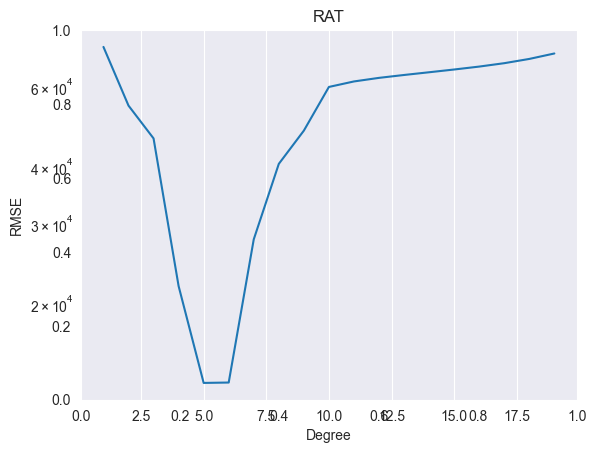

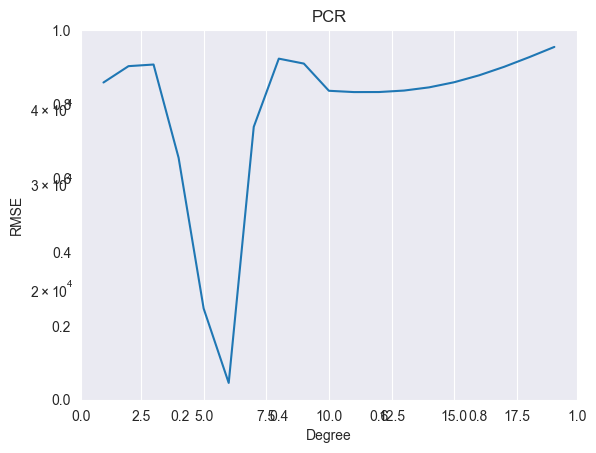

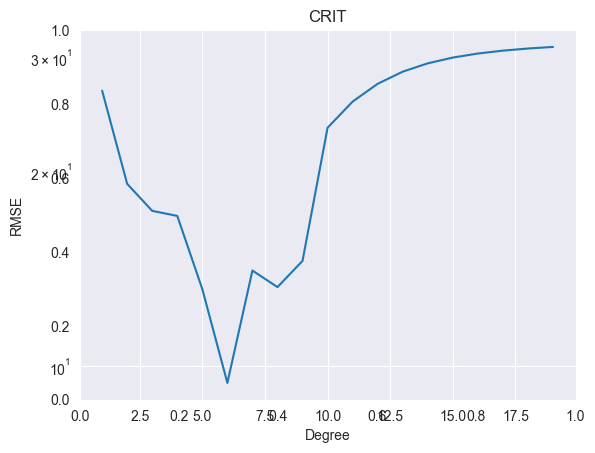

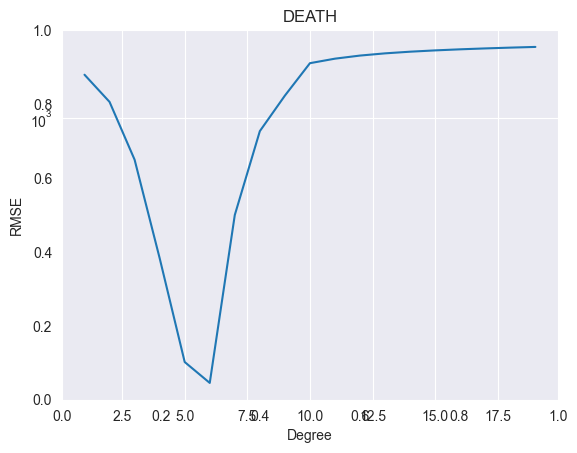

In [14]:
# class Data:
#     X = array_Day.reshape(len(array_Day),1)
#     def __init__(self, y, X_train, X_test, y_train, y_test, fit_degree, X_poly_train, X_poly_test, y_poly_train, y_poly_test, ):
#         self.X_poly_train = X_poly_train
#         self.y = y
#         self.X_train = X_train
#         self.X_test = X_test
#         self.y_train = y_train
#         self.y_test = y_test
#         self.fit_degree = fit_degree
#         self.X_poly_train = X_poly_train
#         self.X_poly_test = X_poly_test
#         self.y_poly_train = y_poly_train
#         self.y_poly_test = y_poly_test
#
#     def splitData(self):
#         self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, self.y, test_size=0.3)
#
#
#
#     def fitting_curve(self):
#
#         # global min_rmse, min_deg
#
#         rmses = []
#         degrees = np.arange(1, 10)
#         min_rmse, min_deg = 1e10, 0
#
#         for deg in degrees:
#
#             # Train features
#             poly_features = PolynomialFeatures(degree=deg, include_bias=False)
#             self.X_poly_train = poly_features.fit_transform(self.X_train)
#
#             # Linear regression
#             poly_reg = LinearRegression()
#             poly_reg.fit(self.X_poly_train, self.y_train)
#
#             # Compare with test data
#             self.X_poly_test = poly_features.fit_transform(self.X_test)
#             poly_predict = poly_reg.predict(self.X_poly_test)
#             poly_mse = mean_squared_error(self.y_test, poly_predict)
#             poly_rmse = np.sqrt(poly_mse)
#             rmses.append(poly_rmse)
#
#             # Cross-validation of degree
#             if min_rmse > poly_rmse:
#                 min_rmse = poly_rmse
#                 min_deg = deg
#
#             print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
#
#             fig = plt.figure()
#             ax = fig.add_subplot(111)
#             ax.plot(degrees, rmses)
#             ax.set_yscale('log')
#             ax.set_xlabel('Degree')
#             ax.set_ylabel('RMSE')
#
#     def print_graph(self):
#         pass

# RAT = Data(
#     array_RAT,[],[],[],[],'',[],[],[],[]
# )
#
# PCR = Data(
#     array_PCR,[],[],[],[],'',[],[],[],[]
#
# )
#
# CRIT = Data(
#     array_Critical,[],[],[],[],'',[],[],[],[]
# )
#
# DEATH = Data(
#     array_Death,[],[],[],[],'',[],[],[],[]
#
# )
#
# print(RAT.X)
#
#
# RAT.splitData()
# PCR.splitData()
# CRIT.splitData()
# DEATH.splitData()
#
# RAT.fitting_curve()

X = array_Day.reshape(len(array_Day),1)
yRAT = array_RAT
yPCR = array_PCR
yCRIT = array_Critical
yDEATH = array_Death

XRAT_train, XRAT_test, yRAT_train, yRAT_test = train_test_split(X, yRAT, test_size=0.3)
XPCR_train, XPCR_test, yPCR_train, yPCR_test = train_test_split(X, yPCR, test_size=0.3)
XCRIT_train, XCRIT_test, yCRIT_train, yCRIT_test = train_test_split(X, yCRIT, test_size=0.3)
XDEATH_train, XDEATH_test, yDEATH_train, yDEATH_test = train_test_split(X, yDEATH, test_size=0.3)

RAT = [XRAT_train, XRAT_test, yRAT_train, yRAT_test, "RAT", '']
PCR = [XPCR_train, XPCR_test, yPCR_train, yPCR_test, "PCR", '']
CRIT = [XCRIT_train, XCRIT_test, yCRIT_train, yCRIT_test, "CRIT", '']
DEATH = [XDEATH_train, XDEATH_test, yDEATH_train, yDEATH_test, "DEATH", '']


cat = [RAT, PCR, CRIT, DEATH]


for cat in cat:

    rmses = []
    degrees = np.arange(1, 20)
    min_rmse, min_deg = 1e10, 0


    for deg in degrees:

        # Train features
        poly_features = PolynomialFeatures(degree=deg, include_bias=False)
        X_poly_train = poly_features.fit_transform(cat[0])

        # Linear regression
        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, cat[2])

        # Compare with test data
        X_poly_test = poly_features.fit_transform(cat[1])
        poly_predict = poly_reg.predict(X_poly_test)
        poly_mse = mean_squared_error(cat[3], poly_predict)
        poly_rmse = np.sqrt(poly_mse)
        rmses.append(poly_rmse)

        # Cross-validation of degree
        if min_rmse > poly_rmse:
            min_rmse = poly_rmse
            min_deg = deg

    cat[5] = min_deg
    # Plot and present results
    print('{} Best degree {} with RMSE {}'.format(cat[4],min_deg, min_rmse))

    fig = plt.figure()
    plt.title(cat[4])
    ax = fig.add_subplot(111)
    ax.plot(degrees, rmses)
    ax.set_yscale('log')
    ax.set_xlabel('Degree')
    ax.set_ylabel('RMSE')


## Plotting polynomial curve - raw data

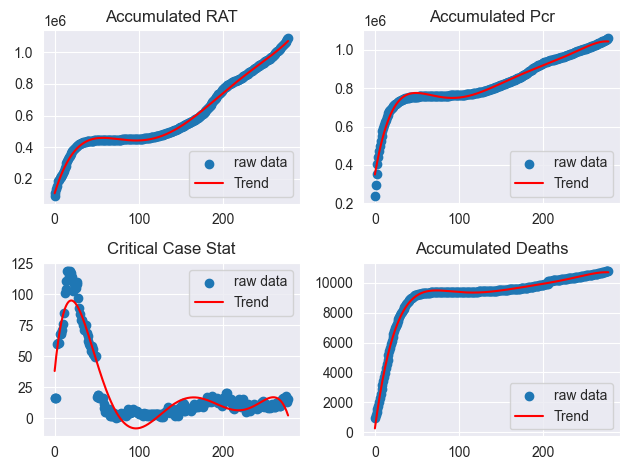

In [15]:
# sklearn fit polynomial_function

poly_reg_model_rat = LinearRegression()
poly_reg_model_pcr = LinearRegression()
poly_reg_model_crit = LinearRegression()
poly_reg_model_death = LinearRegression()

poly_reg_model_rat.fit(PolynomialFeatures(degree=RAT[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)),yRAT)
poly_reg_model_pcr.fit(PolynomialFeatures(degree=PCR[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)),yPCR)
poly_reg_model_crit.fit(PolynomialFeatures(degree=CRIT[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)),yCRIT)
poly_reg_model_death.fit(PolynomialFeatures(degree=DEATH[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)),yDEATH)

y_predicted_rat = poly_reg_model_rat.predict(PolynomialFeatures(degree=RAT[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)))
y_predicted_pcr = poly_reg_model_pcr.predict(PolynomialFeatures(degree=PCR[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)))
y_predicted_crit = poly_reg_model_crit.predict(PolynomialFeatures(degree=CRIT[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)))
y_predicted_death = poly_reg_model_death.predict(PolynomialFeatures(degree=CRIT[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)))


fig, axs = plt.subplots(2,2)

axs[0,0].scatter(X, yRAT,label='raw data')
axs[0,0].plot(X, y_predicted_rat, color='red',label='Trend')
axs[0,0].legend(loc='lower right')
axs[0,0].set_title("Accumulated RAT")

axs[0,1].scatter(X, yPCR,label='raw data')
axs[0,1].plot(X, y_predicted_pcr, color='red',label='Trend')
axs[0,1].legend(loc='lower right')
axs[0,1].set_title("Accumulated Pcr")

axs[1,0].scatter(X, yCRIT,label='raw data')
axs[1,0].plot(X, y_predicted_crit, color='red',label='Trend')
axs[1,0].legend(loc='upper right')
axs[1,0].set_title("Critical Case Stat")

axs[1,1].scatter(X, yDEATH,label='raw data')
axs[1,1].plot(X,y_predicted_death, color='red',label='Trend')
axs[1,1].legend(loc='lower right')
axs[1,1].set_title("Accumulated Deaths")

fig.tight_layout()

# Fitting curve - Delta data


## Train Test split & Identify best degree of polynomial - Delta data

RAT Best degree 6 with RMSE 1784.9829675043297
PCR Best degree 6 with RMSE 2767.348972865671
DEATH Best degree 7 with RMSE 25.880642301396982


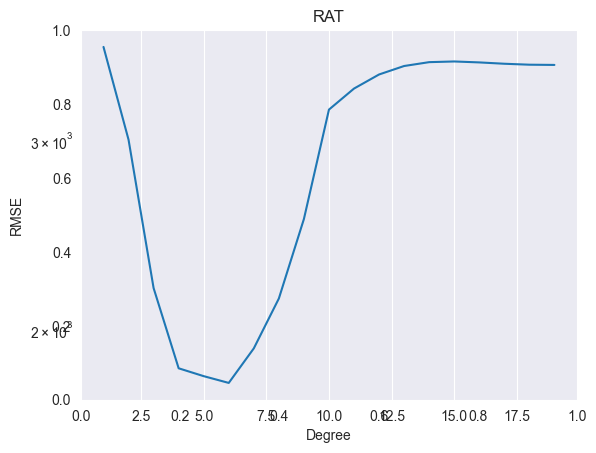

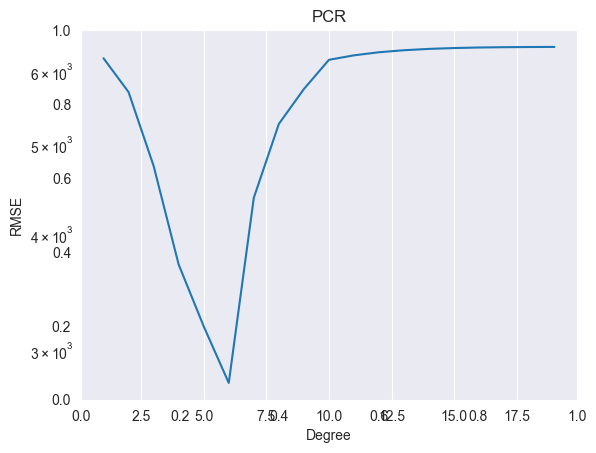

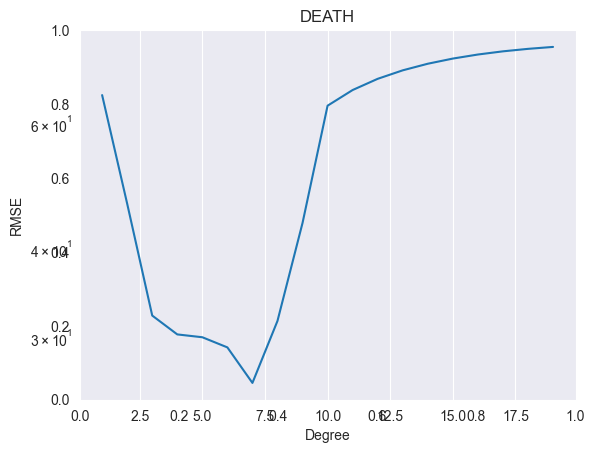

In [16]:
X = array_Day.reshape(len(array_Day),1)
dyRAT = diff_rat
dyPCR = diff_pcr
dyDEATH = diff_death

dXRAT_train, dXRAT_test, dyRAT_train, dyRAT_test = train_test_split(X, dyRAT, test_size=0.3)
dXPCR_train, dXPCR_test, dyPCR_train, dyPCR_test = train_test_split(X, dyPCR, test_size=0.3)
dXDEATH_train, dXDEATH_test, dyDEATH_train, dyDEATH_test = train_test_split(X, dyDEATH, test_size=0.3)

dRAT = [dXRAT_train, dXRAT_test, dyRAT_train, dyRAT_test, "RAT", '']
dPCR = [dXPCR_train, dXPCR_test, dyPCR_train, dyPCR_test, "PCR", '']
dDEATH = [dXDEATH_train, dXDEATH_test, dyDEATH_train, dyDEATH_test, "DEATH", '']


dcat = [dRAT, dPCR, dDEATH]


for dcat in dcat:

    rmses = []
    degrees = np.arange(1, 20)
    min_rmse, min_deg = 1e10, 0


    for deg in degrees:

        # Train features
        poly_features = PolynomialFeatures(degree=deg, include_bias=False)
        X_poly_train = poly_features.fit_transform(dcat[0])

        # Linear regression
        poly_reg = LinearRegression()
        poly_reg.fit(X_poly_train, dcat[2])

        # Compare with test data
        X_poly_test = poly_features.fit_transform(dcat[1])
        poly_predict = poly_reg.predict(X_poly_test)
        poly_mse = mean_squared_error(dcat[3], poly_predict)
        poly_rmse = np.sqrt(poly_mse)
        rmses.append(poly_rmse)

        # Cross-validation of degree
        if min_rmse > poly_rmse:
            min_rmse = poly_rmse
            min_deg = deg

    dcat[5] = min_deg
    # Plot and present results
    print('{} Best degree {} with RMSE {}'.format(dcat[4],min_deg, min_rmse))

    fig = plt.figure()
    plt.title(dcat[4])
    ax = fig.add_subplot(111)
    ax.plot(degrees, rmses)
    ax.set_yscale('log')
    ax.set_xlabel('Degree')
    ax.set_ylabel('RMSE')

## Plotting polynomial curve - Delta data

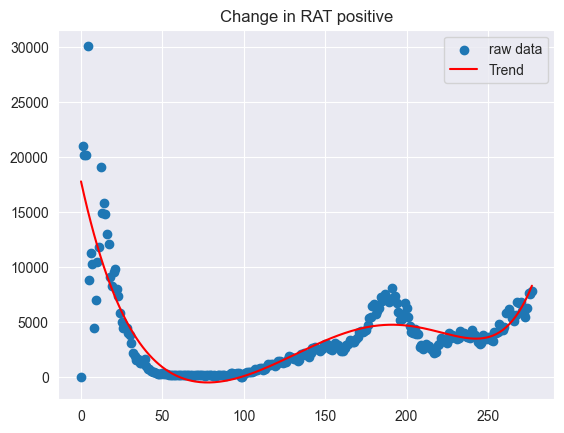

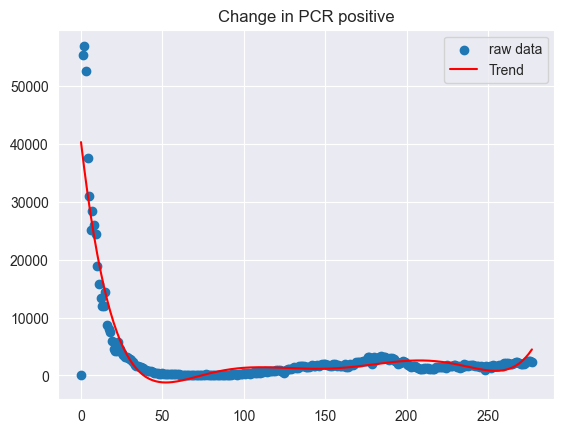

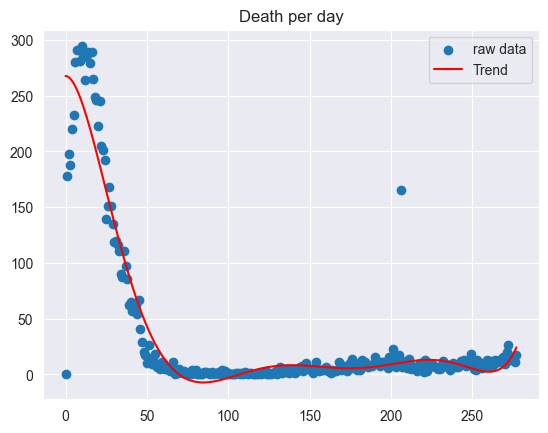

In [17]:
# sklearn fit polynomial_function

poly_reg_model_drat = LinearRegression()
poly_reg_model_dpcr = LinearRegression()
poly_reg_model_ddeath = LinearRegression()

poly_reg_model_drat.fit(PolynomialFeatures(degree=dRAT[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)),dyRAT)
poly_reg_model_dpcr.fit(PolynomialFeatures(degree=dPCR[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)),dyPCR)
poly_reg_model_ddeath.fit(PolynomialFeatures(degree=dDEATH[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)),dyDEATH)

dy_predicted_rat = poly_reg_model_drat.predict(PolynomialFeatures(degree=dRAT[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)))
dy_predicted_pcr = poly_reg_model_dpcr.predict(PolynomialFeatures(degree=dPCR[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)))
dy_predicted_death = poly_reg_model_ddeath.predict(PolynomialFeatures(degree=dDEATH[5], include_bias=False).fit_transform(X.reshape(len(array_Day),1)))


plt.figure()

plt.scatter(X, dyRAT,label='raw data')
plt.plot(X, dy_predicted_rat, color='red',label='Trend')
plt.legend(loc='upper right')
plt.title("Change in RAT positive")

plt.show()

plt.figure()

plt.scatter(X, dyPCR,label='raw data')
plt.plot(X, dy_predicted_pcr, color='red',label='Trend')
plt.legend(loc='upper right')
plt.title("Change in PCR positive")

plt.show()

plt.figure()

plt.scatter(X, dyDEATH,label='raw data')
plt.plot(X, dy_predicted_death, color='red',label='Trend')
plt.legend(loc='upper right')
plt.title("Death per day")

plt.show()